In [1]:
import pandas as pd
# we make inline to draw the graphic when it is in the end of a cell without calling plt.show()
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('electricity.csv')
df.head()

,datetime,nuclear,heat_tec,wind,heat_tes,hydro_ges,hydro_gaes,consumption,month,season,hour
0,2017-01-01 01:00:00,10747,1230,1,5518,913,0,17760,1,Зима,1
1,2017-01-01 02:00:00,10757,1234,1,5645,710,0,17030,1,Зима,2
2,2017-01-01 03:00:00,10756,1226,0,5752,146,0,16498,1,Зима,3
3,2017-01-01 04:00:00,10741,1225,1,5738,243,0,16150,1,Зима,4
4,2017-01-01 05:00:00,10757,1226,3,5726,54,0,15963,1,Зима,5


In [3]:
df.dtypes

datetime       object
nuclear         int64
heat_tec        int64
wind            int64
heat_tes        int64
hydro_ges       int64
hydro_gaes      int64
consumption     int64
month           int64
season         object
hour            int64
dtype: object

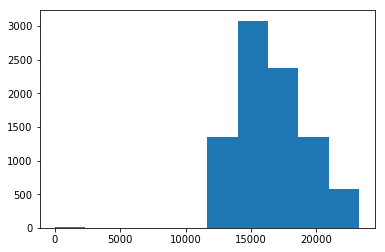

In [4]:
plt.hist(df.consumption)
plt.show()

In [5]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequency of
        array

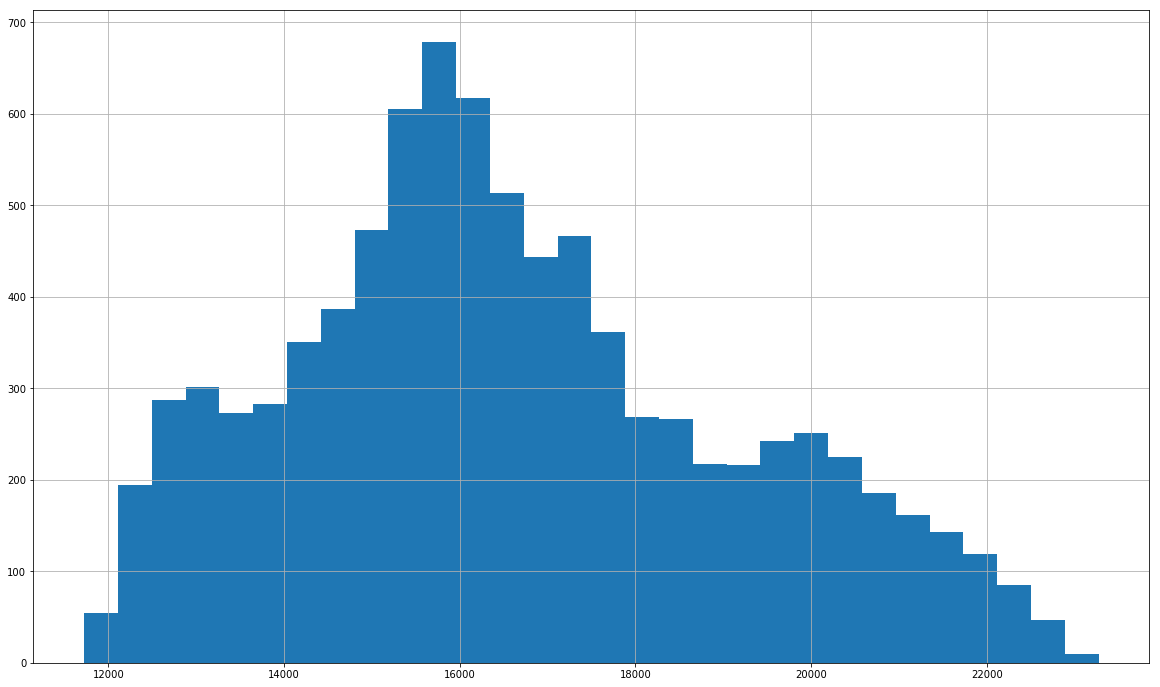

In [6]:
df = df[df.consumption > 0]
#to make an object of certain size
plt.figure(figsize = [20,12]) # unit of measurement - inches
plt.hist(df.consumption, bins = 30)
#to make grid visible
plt.grid()
plt.show()

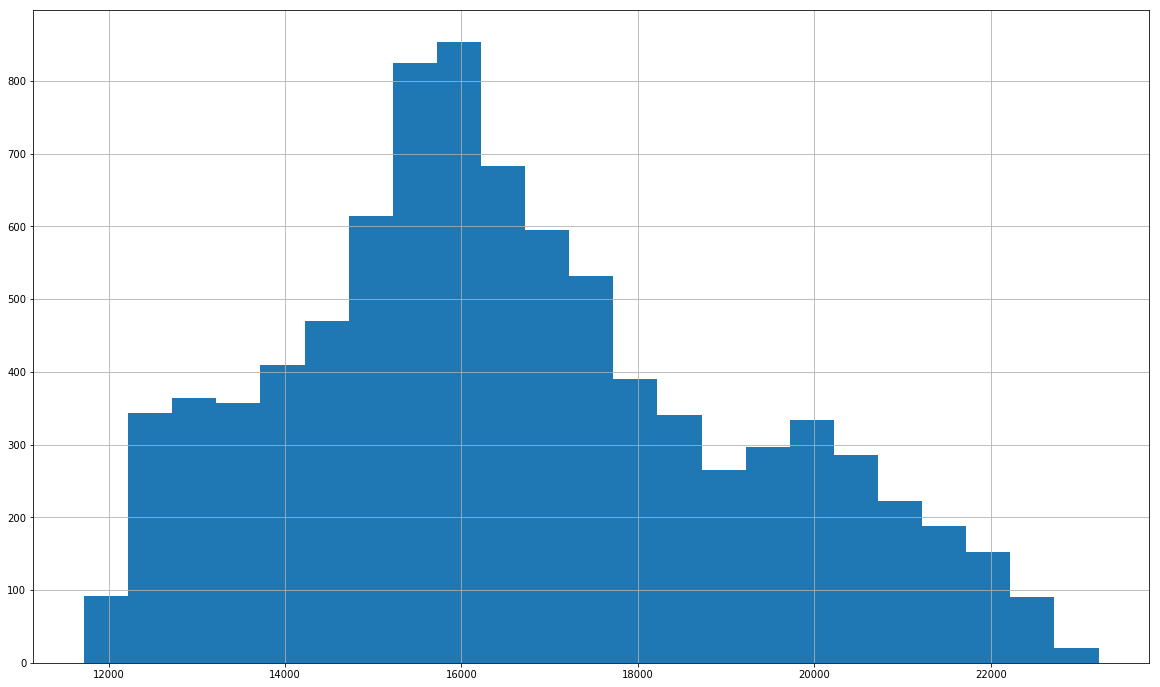

In [7]:
# now we want to specify the hist based on binwidth
# to do that we need to calculate bid number out of binwidth
bins = range(min(df.consumption), max(df.consumption)+1, 500)

plt.figure(figsize = [20,12])
plt.hist(df.consumption, bins = bins)
plt.grid()
plt.show()

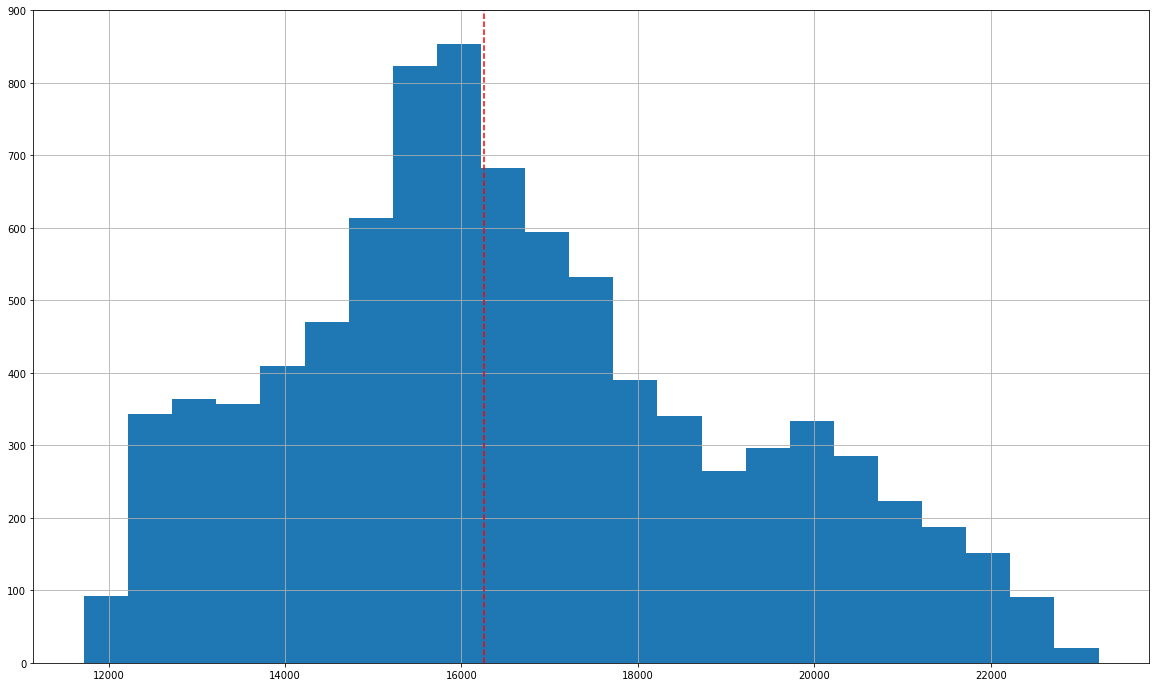

In [8]:
bins = range(min(df.consumption), max(df.consumption)+1, 500)

plt.figure(figsize = [20,12])
plt.hist(df.consumption, bins = bins)
# vlines - to add median in the grph
# vlines = vertival line
plt.vlines(df.consumption.median(), ymin = 0, ymax = 1000, linestyles = 'dashed', colors = 'red')
plt.ylim(0,900)
plt.grid()
plt.show()

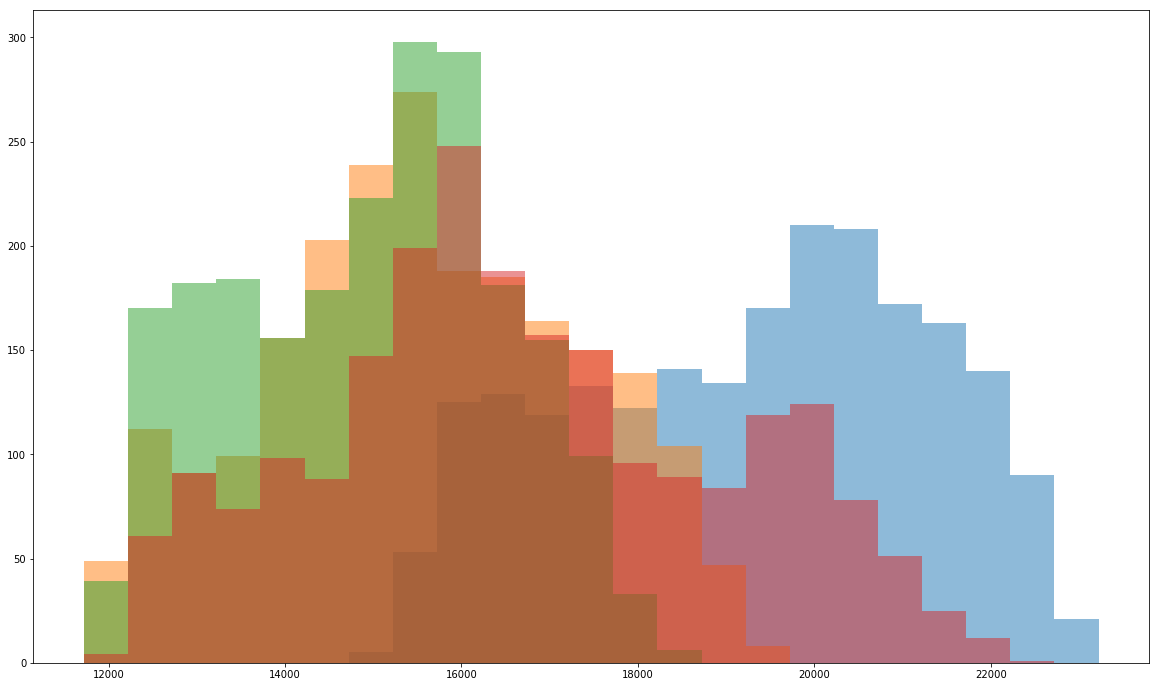

In [9]:
# now we want to create stached bars for seasons
plt.figure(figsize = [20,12])

for season in df.season.unique():
    plt.hist(df[df.season == season].consumption,
            bins = bins, alpha = 0.5)


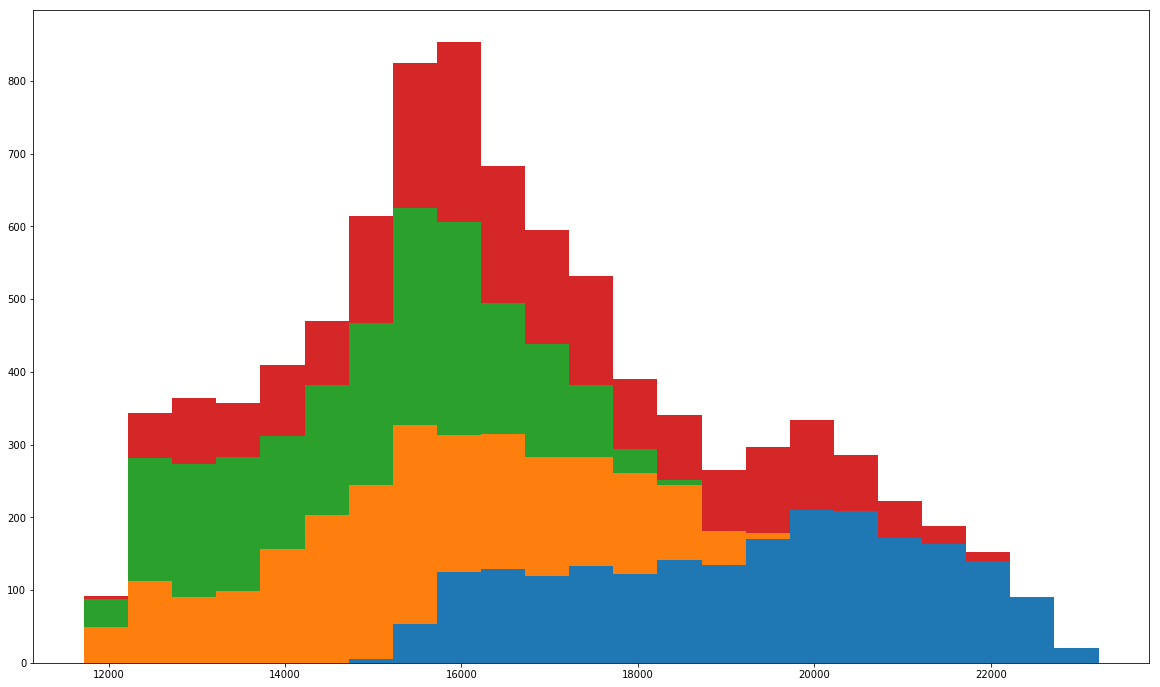

In [10]:
# we can specify global parameter as figsize
plt.rcParams['figure.figsize'] = [20,12]

plt.hist([df[df.season == 'Зима'].consumption,
         df[df.season == 'Весна'].consumption,
         df[df.season == 'Літо'].consumption,
         df[df.season == 'Осінь'].consumption], stacked = True, bins = bins)
plt.show()

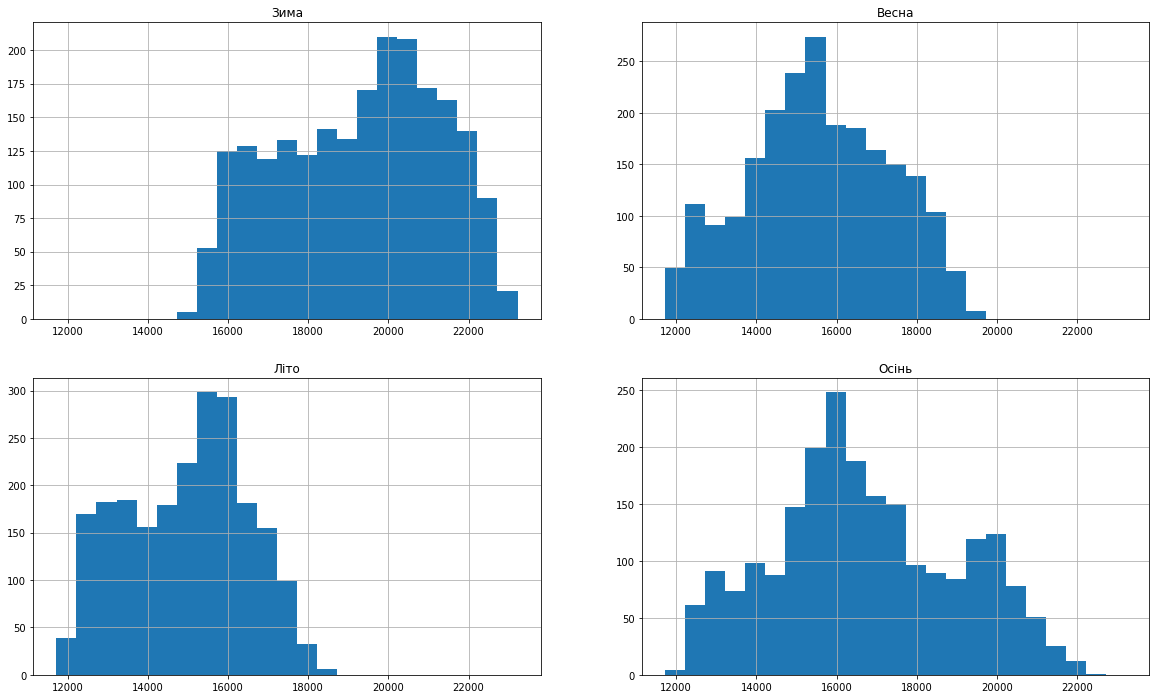

In [11]:
for i in range(0, len(df.season.unique())):
    plt.subplot(2,2,i+1)
    plt.hist(df[df.season == df.season.unique()[i]].consumption, bins = bins)
    plt.title(df.season.unique()[i])
    plt.grid()
    
plt.show()

In [13]:
df.datetime = pd.to_datetime(df.datetime, format = '%Y-%m-%d %H:%M:%S')
df.dtypes

datetime       datetime64[ns]
nuclear                 int64
heat_tec                int64
wind                    int64
heat_tes                int64
hydro_ges               int64
hydro_gaes              int64
consumption             int64
month                   int64
season                 object
hour                    int64
dtype: object

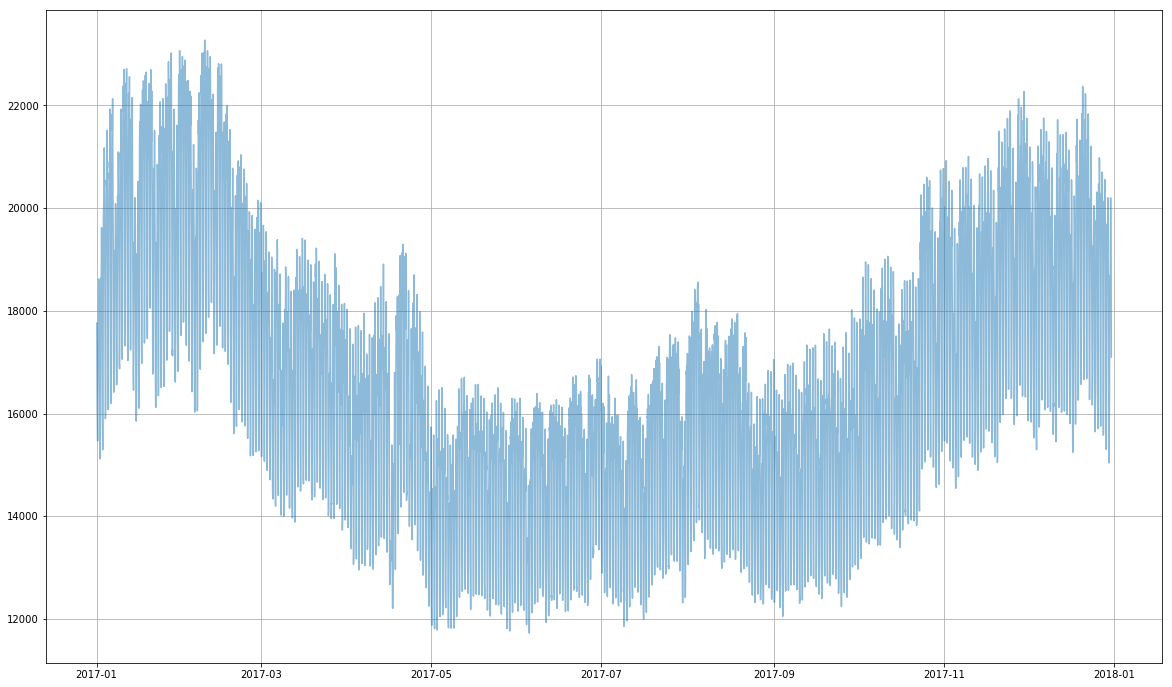

In [14]:
plt.plot(df.datetime, df.consumption, alpha = 0.5)
plt.grid()
plt.show()

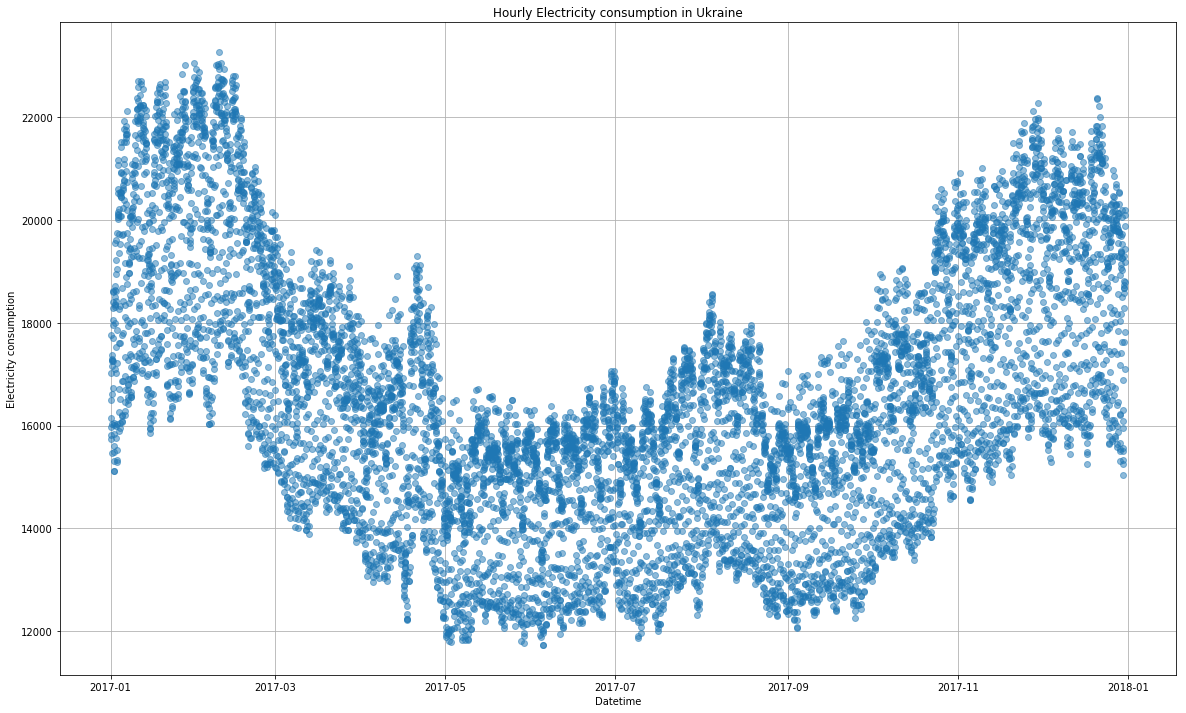

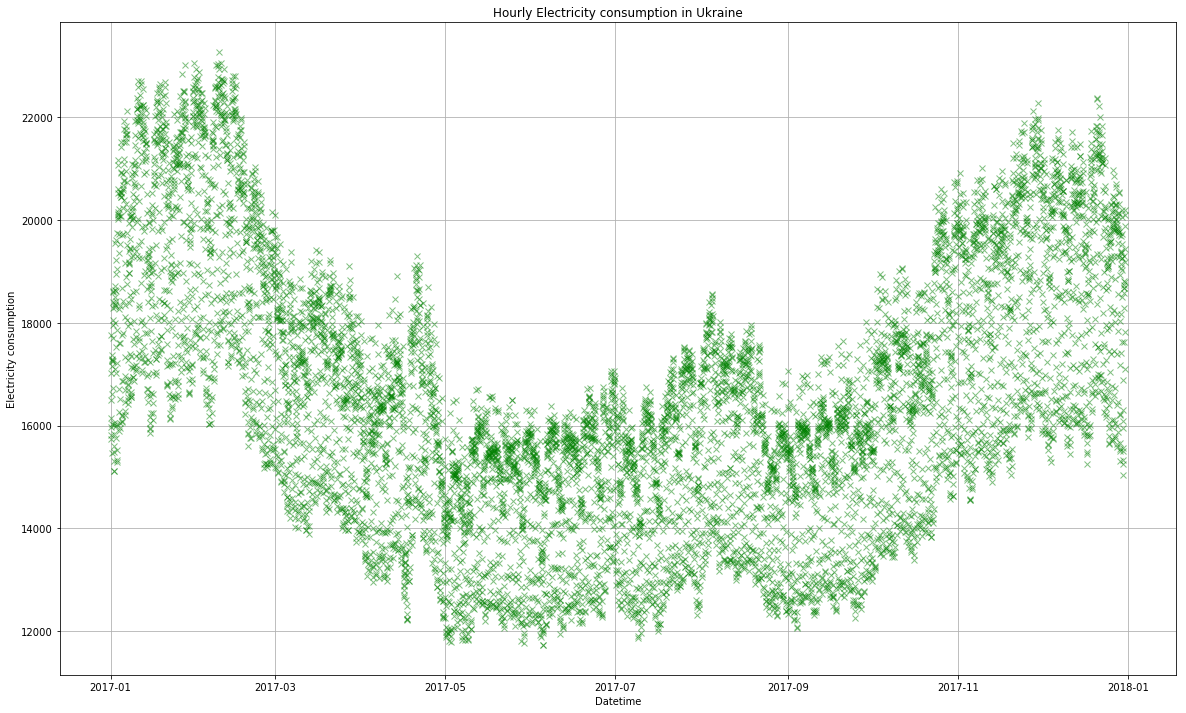

In [24]:
# 'o' - is marker
plt.plot(df.datetime, df.consumption, 'o', alpha = 0.5)
plt.grid()
plt.xlabel('Datetime')
plt.ylabel('Electricity consumption')
plt.title("Hourly Electricity consumption in Ukraine")
plt.show()


plt.plot(df.datetime, df.consumption, 'xg', alpha = 0.5)
plt.grid()
plt.xlabel('Datetime')
plt.ylabel('Electricity consumption')
plt.title("Hourly Electricity consumption in Ukraine")
plt.show()

In [17]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi